## Sistem Deteksi dan Klasifikasi Tipe Kendaraan Transportasi Berbasis
1. Luthfi Fauzi (1301213143)
2. Fadhil Muhamad Pratama (1301213126)
3. Leonardus Adi Widjayanto (1301213423)

### Tahapan
1. Membaca dan memproses data terlebih dahulu (mengambil gambar, mengubah ke grayscale, ekstraksi fitur HOG).
2. Melatih model SVM menggunakan data yang sudah diproses.
3. Menampilkan hasil klasifikasi menggunakan model yang telah dilatih, termasuk confusion matrix dan classification report.
4. Berikut adalah kode yang lebih terstruktur dan diperbaiki berdasarkan alur tersebut:

## 1. Load Data & Ekstraksi Fitur (HOG)
Fungsi untuk membaca gambar dan mengekstrak fitur HOG, kemudian memproses gambar menjadi data dan label.

In [12]:
import cv2
import numpy as np
import os
from skimage.feature import hog

# Fungsi untuk membaca gambar dan labelnya
def load_data(dataset_dir, categories):
    data = []
    labels = []
    
    for idx, category in enumerate(categories):
        category_path = os.path.join(dataset_dir, category)
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Membaca gambar
            
            if img is None:
                print(f"Warning: Unable to load image {img_path}")
                continue  # Skip this image if it can't be loaded
            
            # Mengubah gambar menjadi grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale
            
            # Mengubah ukuran gambar menjadi 64x64
            img_gray = cv2.resize(img_gray, (64, 64))
                
            # Ekstraksi fitur HOG
            fd, hog_image = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            data.append(fd)  # Menambahkan fitur ke list
            labels.append(idx)  # Menambahkan label kategori
            
    return np.array(data), np.array(labels)

## 2. Menampilkan Gambar dan Fitur HOG
Fungsi untuk menampilkan gambar asli dan gambar HOG untuk kategori pertama.

In [13]:
import cv2
import os
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar asli dan gambar HOG untuk 3 gambar dari setiap kategori kendaraan
def display_hog_images(dataset_dir, categories, num_images=3):
    """
    Menampilkan gambar asli dan gambar HOG untuk 3 gambar pertama dari setiap kategori.
    """
    for idx, category in enumerate(categories):
        category_path = os.path.join(dataset_dir, category)
        
        # Mengambil semua gambar dalam kategori ini
        img_names = os.listdir(category_path)
        
        # Menampilkan hanya 3 gambar pertama
        for i, img_name in enumerate(img_names[:num_images]):  # Ambil hanya 3 gambar pertama
            img_path = os.path.join(category_path, img_name)
            
            img = cv2.imread(img_path)  # Membaca gambar asli
            if img is None:
                print(f"Warning: Unable to load image {img_path}")
                continue  # Lewati gambar yang tidak dapat dimuat
            
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Mengubah ke grayscale
            
            # Ekstraksi fitur HOG
            fd, hog_image = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            
            # Menampilkan gambar asli dan gambar HOG
            plt.figure(figsize=(6, 3))
            plt.subplot(1, 2, 1)
            plt.imshow(img_gray, cmap='gray')
            plt.title(f'Original Grayscale Image\nCategory: {category}\nImage: {img_name}')
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(hog_image, cmap='gray')
            plt.title(f'HOG Image\nCategory: {category}\nImage: {img_name}')
            plt.axis('off')
            
            # Menampilkan gambar
            plt.show()

## 3. Melatih Model SVM
Fungsi untuk melatih model SVM menggunakan data yang sudah diekstraksi fiturnya.

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Fungsi untuk melatih model SVM
def train_svm_model(data, labels):
    # Membagi data menjadi training set dan test set (80% untuk training, 20% untuk testing)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # Membuat model SVM dengan kernel linear
    model = svm.SVC(kernel='linear')

    # Melatih model SVM menggunakan training data
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

## 4. Evaluasi Model dengan Classification Report dan Confusion Matrix
Fungsi untuk mengevaluasi model menggunakan classification report dan confusion matrix.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Fungsi untuk mengevaluasi model menggunakan classification report dan confusion matrix
def evaluate_model(model, X_test, y_test, categories):
    # Melakukan prediksi pada test data
    y_pred = model.predict(X_test)

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=categories))

    # Menampilkan confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xticks(np.arange(len(categories)), categories, rotation=45)
    plt.yticks(np.arange(len(categories)), categories)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

## 5. Main Function untuk Menjalankan Seluruh Proses
Berikut adalah bagian utama untuk memuat data, melatih model, dan menampilkan hasil klasifikasi:

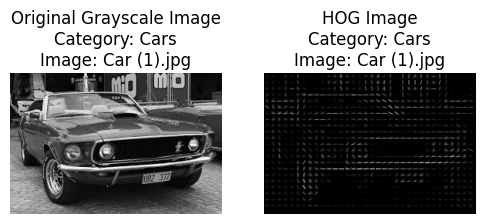

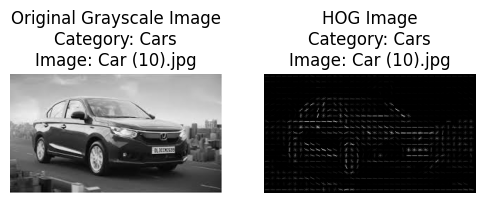

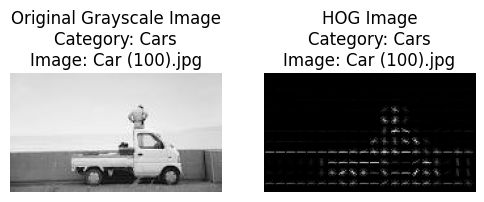

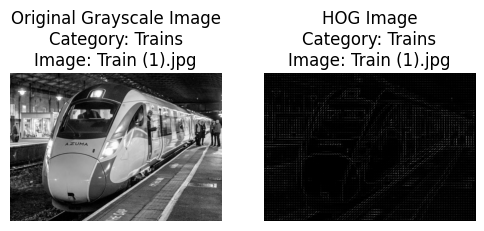

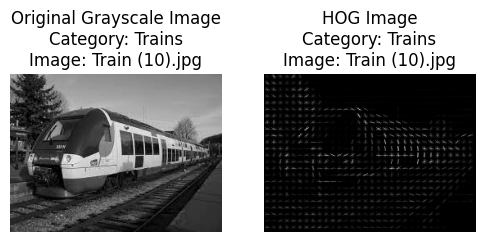

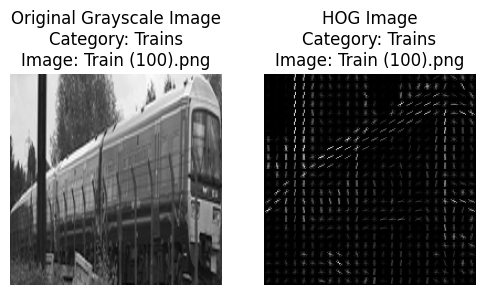

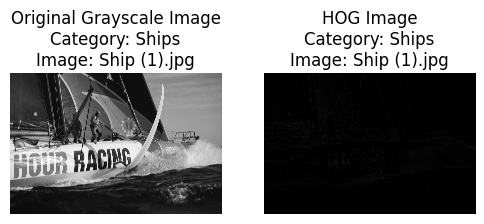

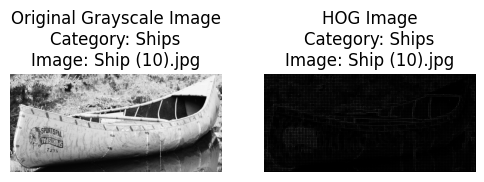

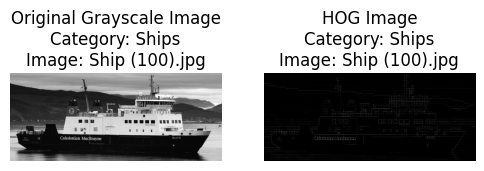

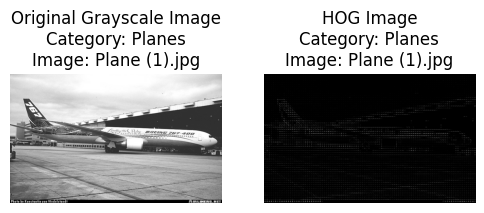

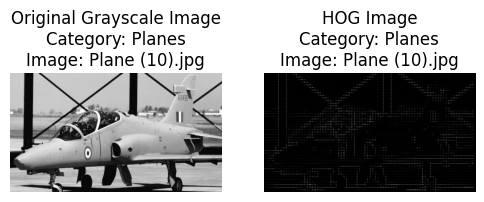

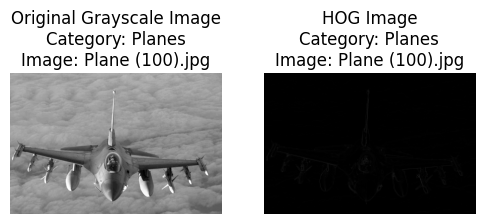

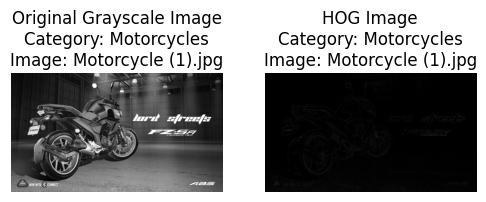

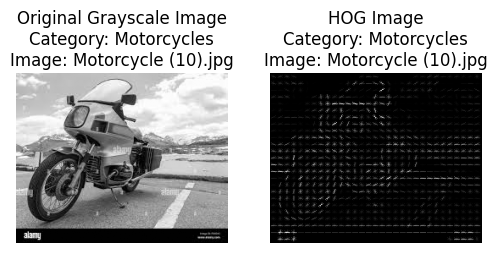

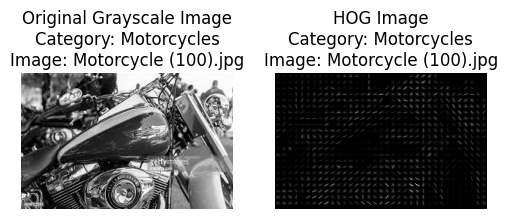

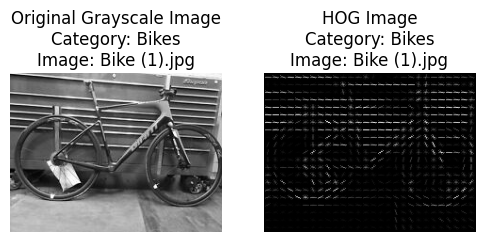

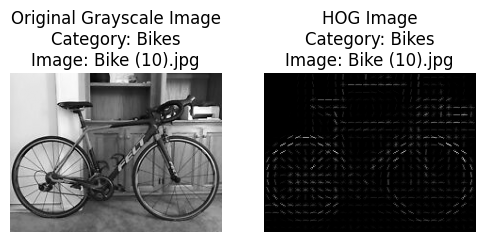

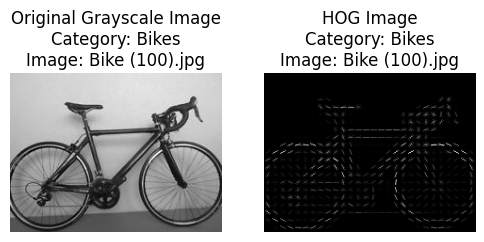

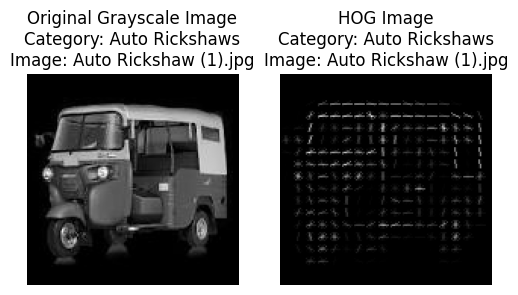

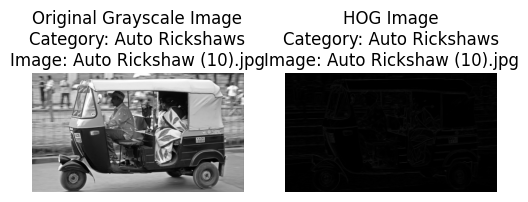

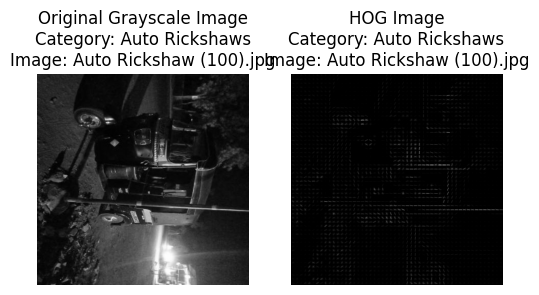

Classification Report:
                precision    recall  f1-score   support

          Cars       0.63      0.66      0.65       179
        Trains       0.67      0.64      0.65       168
         Ships       0.55      0.59      0.57       159
        Planes       0.79      0.79      0.79       176
   Motorcycles       0.69      0.65      0.67       137
         Bikes       0.92      0.88      0.90       162
Auto Rickshaws       0.68      0.70      0.69       137

      accuracy                           0.70      1118
     macro avg       0.71      0.70      0.70      1118
  weighted avg       0.71      0.70      0.70      1118

Confusion Matrix:
[[118  11  12   9  12   1  16]
 [  9 107  23   3   6   5  15]
 [ 18  16  94  19   4   4   4]
 [ 12   3  17 139   5   0   0]
 [ 14   8  13   4  89   1   8]
 [  0   2   7   2   6 143   2]
 [ 15  12   5   1   7   1  96]]


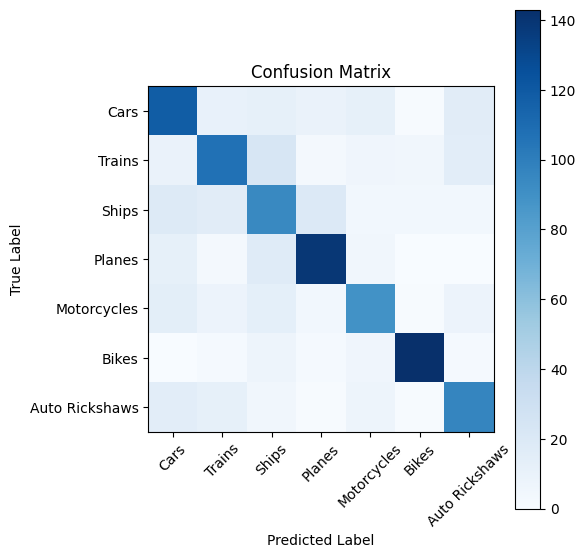

In [16]:
# Path ke dataset yang telah diunduh dan diekstrak
dataset_dir = "C:/Users/fprat/Downloads/Vehicles"  # Pastikan path sesuai
categories = ["Cars", "Trains", "Ships", "Planes", "Motorcycles", "Bikes", "Auto Rickshaws"]  # Nama folder kategori kendaraan

# Menampilkan hanya 3 gambar dari setiap kategori kendaraan beserta gambar HOG-nya
display_hog_images(dataset_dir, categories, num_images=3)

# Memuat data dan ekstraksi fitur
data, labels = load_data(dataset_dir, categories)

# Melatih model SVM
model, X_test, y_test = train_svm_model(data, labels)

# Evaluasi model
evaluate_model(model, X_test, y_test, categories)